In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
len(train_labels)

60000

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

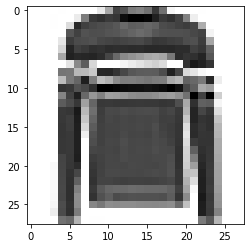

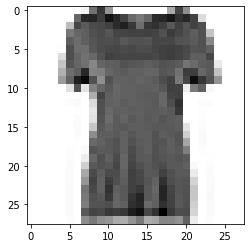

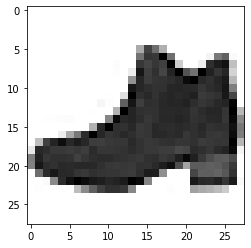

In [19]:
plt.figure()
plt.imshow(train_images[5],cmap=plt.cm.binary)
plt.show()

plt.figure()
plt.imshow(train_images[10],cmap=plt.cm.binary)
plt.show()

plt.figure()
plt.imshow(train_images[15],cmap=plt.cm.binary)
plt.show()


In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4956 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3098 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print( test_loss)
print( test_acc)

313/313 - 0s - loss: 0.3417 - accuracy: 0.8793
0.34174495935440063
0.8792999982833862


In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

predictions[0]

array([1.2395040e-07, 6.5150448e-11, 1.4499661e-09, 8.9501606e-09,
       2.1374992e-08, 2.6757158e-05, 1.4284554e-06, 1.0379384e-02,
       5.9504083e-07, 9.8959166e-01], dtype=float32)